In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math

In [176]:
credit_data = pd.read_csv("PythonMachineLearning/Datasets/Datasets/credit_data.csv")

features = credit_data[["income", "age", "loan"]]
target = credit_data.default

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size = 0.25)

model = LogisticRegression()
model.fit = model.fit(feature_train, target_train)

predictions = model.fit.predict(feature_test)
print(model.fit.intercept_, model.fit.coef_[0])
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))

[0.00322697] [-5.57801183e-05 -1.30606665e-01  8.60889158e-04]
[[424   9]
 [ 32  35]]
0.918


In [5]:
## Andrew NG Course Logistic Regression Matlab to Python

In [58]:
data = pd.read_csv("machine-learning-Logistic_Regression/ex2/ex2data2.txt")

x = np.array(data[["x1", "x2"]]).reshape(-1,2)
Y = np.array(data[["y"]]).reshape(-1,1)

m,n = x.shape
X = np.insert(x,0, np.ones((m)), axis = 1)
theta = np.zeros((n+1,1))

In [47]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def CostFunction(theta,X,Y,lamda):
    
    m = Y.shape[0]
    grad = np.zeros(theta.shape)
    
    J = (-1/m)*(Y.T@(np.log(sigmoid(X@theta))) + (1-Y).T@np.log(1 - sigmoid(X@theta))) + (lamda/(2*m))*sum((theta[1:]**2))
    
    regularized_grad = (lamda/m)*theta
    regularized_grad[0] = 0
    grad = X.T@(sigmoid(X@theta) - Y)/m + regularized_grad
    
    return J, grad

def gradientDescentMulti(X, Y, theta, alpha, num_iters):
    
    J_history = np.zeros((num_iters, 1));
    lamda = 1
    
    for i in range(num_iters):
        
        J, grad = CostFunction(theta,X,Y,lamda)
        
        th = theta - alpha*grad
        J_history[i] = J
        
        theta = th
        
    return theta, J_history

Theta Optimal : [[-0.02183441 -0.23100749 -0.00242991]]
Accuracy  0.5338983050847458


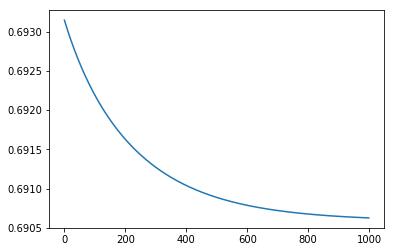

In [68]:
t, J_his = gradientDescentMulti(X, Y, theta, 0.03, 1000)

print("Theta Optimal :", t.T)
hy = np.where(sigmoid(X@t) >= 0.5, 1, 0)
print("Accuracy ",np.count_nonzero((hy - Y) == 0)/m)
plt.plot(range(1000),J_his)
plt.show()

In [69]:
## Multi Class Logistic Regression using the one v/s All method

In [177]:
from sklearn.datasets import load_digits

digits = load_digits()
d_features = digits.data
d_target = digits.target

num_labels = 10

In [178]:
def Multi_LR(X,Y,num_labels):
    
    (m,n) = X.shape
    all_theta = np.zeros((num_labels, n+1))
    
    model = LogisticRegression()
    
    for i in range(num_labels):
        
        Model_fit = model.fit(X, np.where(Y == i,1,0).reshape(-1,1))
        
        all_theta[i,:] =   np.append([Model_fit.intercept_],[Model_fit.coef_])
    
    return all_theta
    

In [180]:
all_theta = Multi_LR(d_features,d_target,num_labels)
all_theta = np.delete(all_theta,0, 1)

P = d_features@all_theta.T
p = np.argmax(P.T, axis=0)

print("Accuracy ",np.count_nonzero((p - d_target) == 0)/len(d_target))

Accuracy  0.9910962715637173


/Users/chaitanyabalasankula/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
